## House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df = pd.read_csv("C:/Users/chilesh/Desktop/Data science/project 2/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Text(0.5, 0, 'Selling Price')

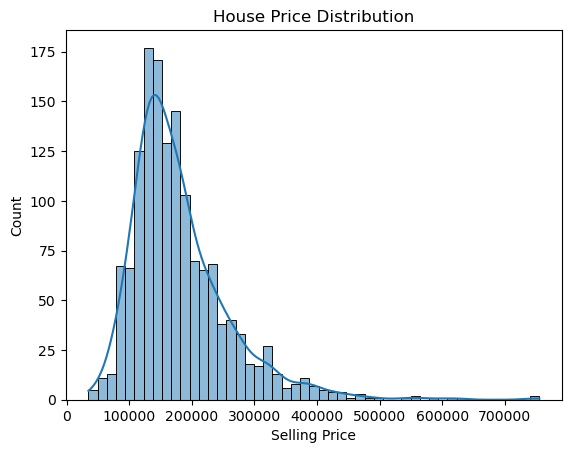

In [8]:
sns.histplot(df['SalePrice'],kde=True)
plt.title('House Price Distribution')
plt.xlabel('Selling Price')

In [9]:
df.isnull().sum().head(10)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

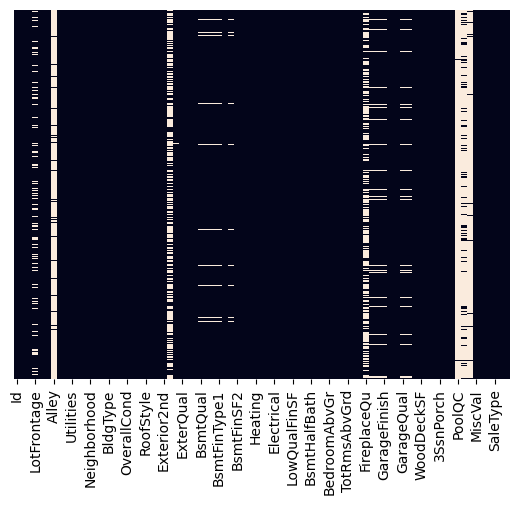

In [10]:
## heat map of missing Values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

In [11]:
df.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [12]:
dd = df.copy()

In [13]:
columns = ['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType']

dd= dd.drop(columns,axis = 1)

In [14]:
dd.isnull().sum().sort_values(ascending=False).head(10)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
dtype: int64

In [15]:
dd.columns,


(Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
        'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
        'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
        'WoodDeckSF'

## Plotting

In [16]:
area_cost = dd.groupby('SalePrice')['LotArea'].mean().reset_index()
area_cost

,SalePrice,LotArea
0,34900,7879.0
1,35311,9000.0
2,37900,5925.0
3,39300,5000.0
4,40000,8500.0
...,...,...
658,582933,13891.0
659,611657,12919.0
660,625000,35760.0
661,745000,15623.0


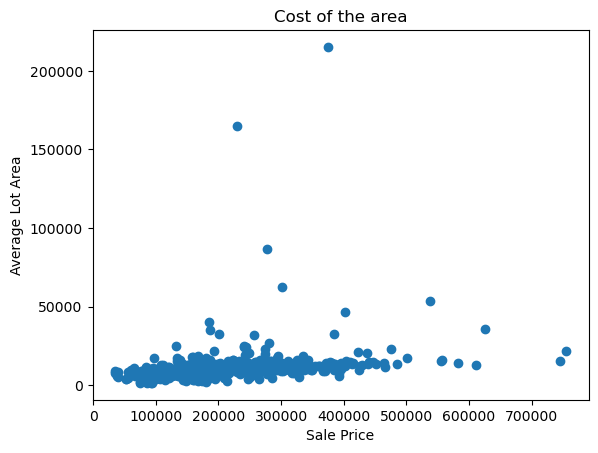

In [17]:
plt.Figure(figsize=(10,8))
plt.scatter(area_cost['SalePrice'],area_cost['LotArea'])
plt.title('Cost of the area')
plt.xlabel('Sale Price')
plt.ylabel('Average Lot Area')
plt.show()

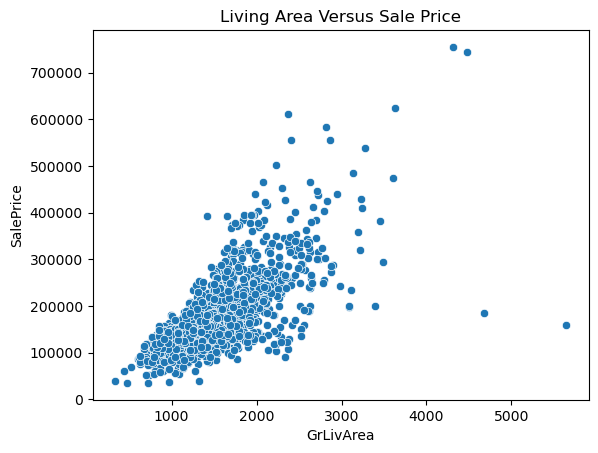

In [18]:

sns.scatterplot(x='GrLivArea',y='SalePrice',data = dd)
plt.title('Living Area Versus Sale Price')
plt.show()

In [19]:
dd.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

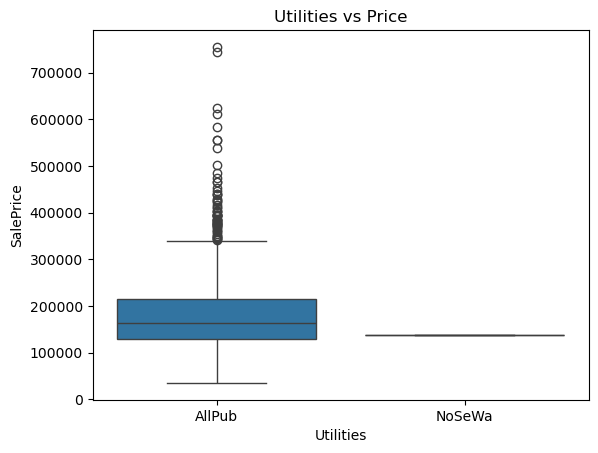

In [20]:
sns.boxplot(x='Utilities',y='SalePrice',data=dd)
plt.title('Utilities vs Price')
plt.show()

In [21]:
sale_con_typ_price=dd.groupby(['SaleCondition','SaleType'])['SalePrice'].mean().reset_index()
sale_con_typ_price.sort_values( by = 'SalePrice',ascending=False)

,SaleCondition,SaleType,SalePrice
1,Abnorml,CWD,328900.000000
18,Partial,New,274945.418033
12,Normal,Con,269600.000000
17,Partial,ConLD,235128.000000
14,Normal,ConLI,219237.500000
11,Normal,CWD,188750.000000
16,Normal,WD,175714.275000
7,Alloca,WD,167377.416667
9,Family,WD,150315.789474
5,Abnorml,WD,147607.700000


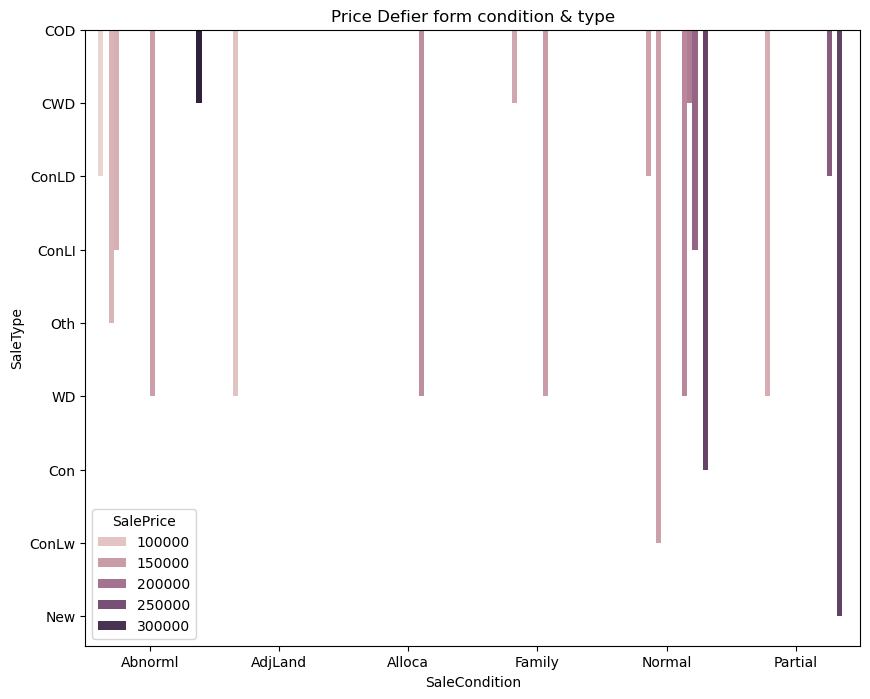

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x='SaleCondition',y='SaleType',hue='SalePrice',data = sale_con_typ_price)
plt.title('Price Defier form condition & type')
plt.show()

## Handeling the Missing Values

In [23]:
dd.isnull().sum().sort_values(ascending =False).head(15)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrArea        8
Electrical        1
LandSlope         0
dtype: int64

In [24]:
dd['FireplaceQu'] = dd['FireplaceQu'].fillna('None')


In [25]:
dd['Electrical'] = dd['Electrical'].fillna(dd['Electrical'].mode()[0])

In [26]:
dd.LotConfig.value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [27]:
dd['LotFrontage']=dd['LotFrontage'].fillna(dd['LotFrontage'].median())

In [28]:
dd.GarageCars.value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [29]:
dd['GarageArea'] = dd['GarageArea'].fillna(0)
dd['GarageCars'] = dd['GarageCars'].fillna(0)
dd['GarageYrBlt'] = dd['GarageYrBlt'].fillna(dd['YearBuilt'])

In [30]:
dd.isnull().sum().sort_values(ascending =False).head(15)

GarageFinish    81
GarageCond      81
GarageQual      81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MSSubClass       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
dtype: int64

In [31]:
garage_cols = [
    'GarageCond',
    'GarageQual',
    'GarageType',
    'GarageFinish']

dd[garage_cols] = dd[garage_cols].fillna('None')

In [32]:
dd.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [33]:
dd['MasVnrArea'] = dd['MasVnrArea'].fillna(0)

In [34]:
dd.isnull().sum().sort_values(ascending=False).head(10)

BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
LotShape         0
Street           0
LotArea          0
MSSubClass       0
MSZoning         0
dtype: int64

In [35]:
dd[['BsmtExposure', 'BsmtFinType2','BsmtCond','BsmtQual','BsmtFinType1']].head()

,BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinType1
0,No,Unf,TA,Gd,GLQ
1,Gd,Unf,TA,Gd,ALQ
2,Mn,Unf,TA,Gd,GLQ
3,No,Unf,Gd,TA,ALQ
4,Av,Unf,TA,Gd,GLQ


In [36]:
bsmt_num_cols=['BsmtExposure', 'BsmtFinType2','BsmtCond','BsmtQual','BsmtFinType1']

dd[bsmt_num_cols] = dd[bsmt_num_cols].fillna('None')

In [37]:
dd.isnull().sum().sort_values(ascending=False).head(10)

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
LandSlope      0
dtype: int64

In [38]:
dd.select_dtypes(include = ['int']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Feature Engineering & Encoding

In [39]:
## Age of the building & remodel

dd['HouseAge'] = dd['YrSold'] - dd['YearBuilt']
dd['RemodAge'] = dd['YrSold'] -dd['YearRemodAdd']

In [40]:
dd['TotalSF'] = (dd['TotalBsmtSF'] + dd['1stFlrSF'] + dd['2ndFlrSF'])

In [41]:
dd['OverallScore'] = dd['OverallQual'] * dd['OverallCond']

In [42]:
## Binary presence Feature

dd['HasGarage'] = (dd['GarageArea']>0).astype(int)
dd['HasBasement'] = (dd['TotalBsmtSF']>0).astype(int)
dd['HasFireplace'] = (dd['Fireplaces']>0).astype(int)
dd['HasPool'] = (dd['PoolArea']>0).astype(int)

## Ordinal Encoding

In [43]:
qual_mapping = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

ordinal_cols = [
    'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond',
    'HeatingQC',
    'KitchenQual',
    'GarageQual', 'GarageCond',
    'FireplaceQu'
]

for col in ordinal_cols:
    dd[col] = dd[col].map(qual_mapping)

In [44]:
dd[ordinal_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,FireplaceQu
0,4,3,4,3,5,4,3,3,0
1,3,3,4,3,5,3,3,3,3
2,4,3,4,3,5,4,3,3,3
3,3,3,3,4,4,4,3,3,4
4,4,3,4,3,5,4,3,3,3


In [45]:
dd.isnull().sum().sort_values(ascending=False).head(10)

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
LandSlope      0
dtype: int64

## Nominal Encoding

In [46]:
nominal_cols = [
    'MSZoning','Street','LotConfig','Neighborhood',
    'Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
    'Foundation','SaleType','SaleCondition'
]

dd = pd.get_dummies(dd, columns=nominal_cols, drop_first=True)

In [47]:
col_cat = dd.select_dtypes(include='object').columns
print(col_cat)


Index(['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive'],
      dtype='object')


In [48]:
dd = pd.get_dummies(dd,columns=col_cat,drop_first=True)

In [49]:
dd.shape

(1460, 224)

In [50]:
fd =  dd.copy()

## Modelbuilding

In [51]:
fd.isnull().sum().sum()

np.int64(0)

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
x = fd.drop('SalePrice',axis = 1)
y = fd['SalePrice']

In [55]:
import random
random.seed(42)
x_train,x_test,y_train,y_test =  train_test_split(x,y,
                                                  test_size = 0.2,
                                                  random_state= 42)

In [56]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
y_pred = model.predict(x_test)

In [61]:
pd.DataFrame({
    'Actual':y_test,
    'Predicted': y_pred
}).head()

,Actual,Predicted
892,154500,151022.305939
1105,325000,344266.670205
413,115000,99436.048168
522,159000,183357.391419
1036,315500,304780.842469


In [65]:
from sklearn.metrics import mean_absolute_error , mean_squared_error 

mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print("MAE:",mae)
print("RMSE:",rmse)

MAE: 21329.1183971022
RMSE: 51266.14530641721


In [66]:
print('Train R2:',model.score(x_train,y_train))
print('Test R2:',model.score(x_test,y_test))

Train R2: 0.9237419281511408
Test R2: 0.6573525579503994


In [67]:
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(10)


,Feature,Coefficient
123,RoofMatl_WdShngl,693330.078250
119,RoofMatl_Metal,689564.189526
120,RoofMatl_Roll,662063.274163
117,RoofMatl_CompShg,661487.144393
122,RoofMatl_WdShake,655475.503390
121,RoofMatl_Tar&Grv,654983.901934
144,Exterior2nd_ImStucc,64634.154827
116,RoofStyle_Shed,40330.385373
83,Neighborhood_StoneBr,39919.926016
53,MSZoning_FV,32877.358737


In [70]:
import joblib
joblib.dump(model, 'house_price_model.pkl')

['house_price_model.pkl']